**HOMEWORK 3 - ASSIGNMENT 1**
_Ramda Yanurzha - ry692@nyu.edu_

Importing necessary libraries

In [149]:
from __future__ import print_function
__author__= 'ry692@nyu.edu'
import os
import pylab as pl
import numpy as np
from scipy.optimize import curve_fit, minimize

Initializing default values

In [150]:
popmean = 100 #population mean
p=0.5 #probability for binomial distribution
md = {}
means = {}

Generate random number (N>10,N<2000)

In [158]:
mysize=np.random.choice((range(10,2000)),100, replace=False)
mysize

array([1401,   44,   67,  190,  320,  672, 1241,  918, 1679,  130,  325,
       1643,  361, 1639, 1388,  414,  503,  148, 1025,  830,   34,  104,
       1984, 1731,  290,  990,  701,  200, 1151, 1516,  783,  890, 1198,
        904, 1986, 1683,  816, 1282,   32, 1370, 1987,  747, 1575, 1111,
        459,  491, 1290, 1112,  668, 1740, 1828,  259,   47, 1294,   22,
        368,   30, 1720, 1775, 1576, 1606, 1149,  133,  943,  432, 1834,
       1087,  708,  893, 1776, 1455, 1612, 1229,  270,  732, 1336, 1242,
        436, 1480, 1556, 1382, 1584,  653,  898,  991, 1305,  666, 1920,
       1202,  116,  680,  327, 1235,  571, 1497, 1244,  917, 1286,  309,
       1808])

Generate random sample of each distribution

In [159]:
md['chisq']={}
md['normal']={}
md['poisson']={}
md['binomial']={}
md['rayleigh']={}
md['gamma']={}
means['chisq'] = {}
means['normal'] = {}
means['poisson'] = {}
means['binomial'] = {}
means['rayleigh'] = {}
means['gamma'] = {}


for n in mysize:
    #chi-square distribution
    md['chisq'][n] = np.random.chisquare(popmean, size=n)
    #normal distribution
    md['normal'][n] = np.random.normal(popmean,10,size=n)
    #poisson distribution
    md['poisson'][n] = np.random.poisson(popmean,size=n)
    #binomial distribution
    md['binomial'][n] = np.random.binomial(popmean / p,p,size=n) #assuming p=0.5
    #rayleigh distribution
    mode_rayleigh = np.sqrt(2 / np.pi) * popmean
    md['rayleigh'][n] = np.random.rayleigh(mode_rayleigh,size=n)
    #gumbel distribution
    md['gamma'][n] = np.random.gamma(popmean,1.0,size=n)
    


Plotting each distribution

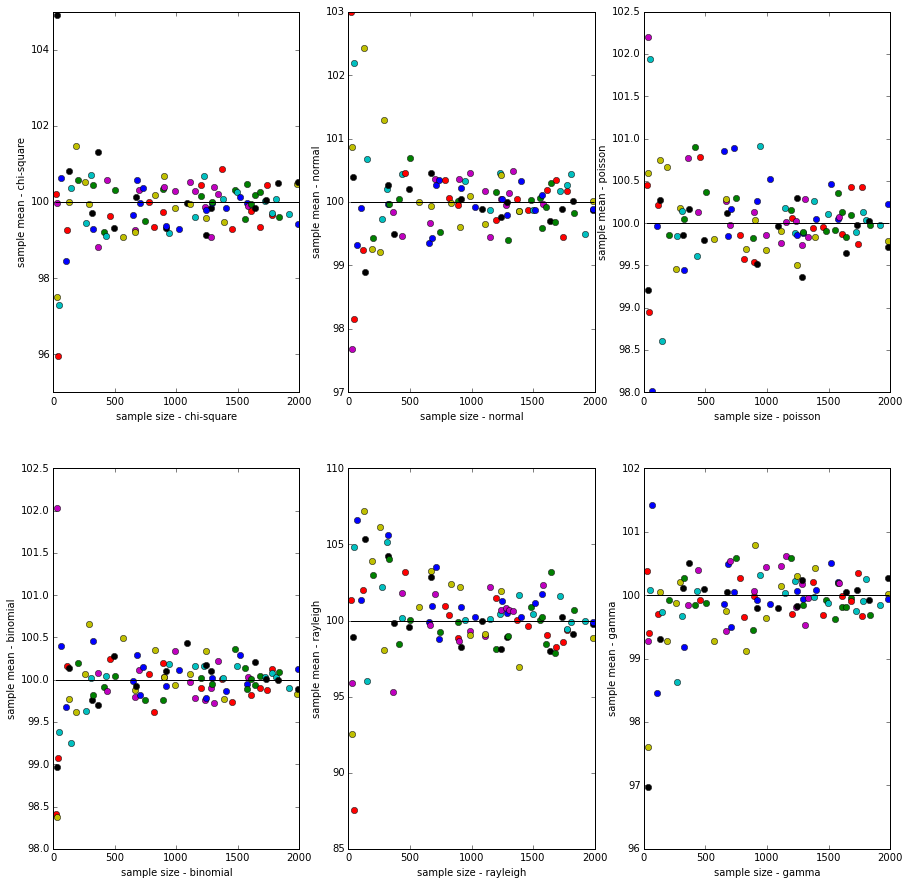

In [160]:


fig_mu_N = pl.figure(figsize=(15,15))
axchisq_mu_n = fig_mu_N.add_subplot(231)
axnorm_mu_n = fig_mu_N.add_subplot(232)
axpoisson_mu_n = fig_mu_N.add_subplot(233)
axbinom_mu_n = fig_mu_N.add_subplot(234)
axray_mu_n = fig_mu_N.add_subplot(235)
axgamma_mu_n = fig_mu_N.add_subplot(236)
for nn in md['chisq'].iterkeys():
    means['chisq'][nn] = md['chisq'][nn].mean()
    #and plot it
    axchisq_mu_n.plot(nn, means['chisq'][nn], 'o')
    axchisq_mu_n.set_xlabel('sample size - chi-square')
    axchisq_mu_n.set_ylabel('sample mean - chi-square')
    axchisq_mu_n.plot([min(mysize), max(mysize)],[popmean,popmean], 'k')
for nn in md['normal'].iterkeys():
    means['normal'][nn] = md['normal'][nn].mean()
    #and plot it
    axnorm_mu_n.plot(nn, means['normal'][nn], 'o')
    axnorm_mu_n.set_xlabel('sample size - normal')
    axnorm_mu_n.set_ylabel('sample mean - normal')
    axnorm_mu_n.plot([min(mysize), max(mysize)],[popmean,popmean], 'k')
for nn in md['poisson'].iterkeys():
    means['poisson'][nn] = md['poisson'][nn].mean()
    #and plot it
    axpoisson_mu_n.plot(nn, means['poisson'][nn], 'o')
    axpoisson_mu_n.set_xlabel('sample size - poisson')
    axpoisson_mu_n.set_ylabel('sample mean - poisson')
    axpoisson_mu_n.plot([min(mysize), max(mysize)],[popmean,popmean], 'k')
for nn in md['binomial'].iterkeys():
    means['binomial'][nn] = md['binomial'][nn].mean()
    #and plot it
    axbinom_mu_n.plot(nn, means['binomial'][nn], 'o')
    axbinom_mu_n.set_xlabel('sample size - binomial')
    axbinom_mu_n.set_ylabel('sample mean - binomial')
    axbinom_mu_n.plot([min(mysize), max(mysize)],[popmean,popmean], 'k')
for nn in md['rayleigh'].iterkeys():
    means['rayleigh'][nn] = md['rayleigh'][nn].mean()
    #and plot it
    axray_mu_n.plot(nn, means['rayleigh'][nn], 'o')
    axray_mu_n.set_xlabel('sample size - rayleigh')
    axray_mu_n.set_ylabel('sample mean - rayleigh')
    axray_mu_n.plot([min(mysize), max(mysize)],[popmean,popmean], 'k')
for nn in md['gamma'].iterkeys():
    means['gamma'][nn] = md['gamma'][nn].mean()
    #and plot it
    axgamma_mu_n.plot(nn, means['gamma'][nn], 'o')
    axgamma_mu_n.set_xlabel('sample size - gamma')
    axgamma_mu_n.set_ylabel('sample mean - gamma')
    axgamma_mu_n.plot([min(mysize), max(mysize)],[popmean,popmean], 'k')

Generate histogram from all sample means

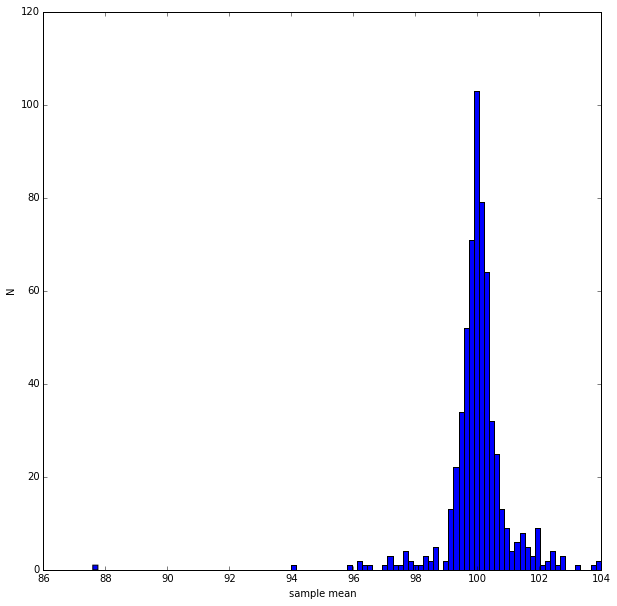

In [154]:
allmean = []
for n in means['chisq']:
    allmean.append(means['chisq'][n])
for n in means['normal']:
    allmean.append(means['normal'][n])
for n in means['poisson']:
    allmean.append(means['poisson'][n])
for n in means['binomial']:
    allmean.append(means['binomial'][n])
for n in means['rayleigh']:
    allmean.append(means['rayleigh'][n])
for n in means['gamma']:
    allmean.append(means['gamma'][n])

pl.figure(figsize=(10,10))  
pl.hist(allmean,bins=100, alpha=1)
pl.legend(loc='upper right')
pl.xlabel('sample mean')
pl.ylabel('N')
 